In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import zipfile
from PIL import Image
import glob
import os
import shutil
from collections import defaultdict
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Extract data from zip file and create 2 folders for cats and dogs
zip_file_path = '/content/drive/MyDrive/Dogs-VS-Cats/train.zip'
extracted_folder_path = '/content/drive/MyDrive/Dogs-VS-Cats/trainFolder'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Create 'cats' and 'dogs' directories if they don't exist
os.makedirs(cats_dir, exist_ok=True)
os.makedirs(dogs_dir, exist_ok=True)

source_dir = '/content/drive/MyDrive/Dogs-VS-Cats/trainFolder/train'
cats_dir = '/content/drive/MyDrive/Dogs-VS-Cats/trainFolder/cats'
dogs_dir = '/content/drive/MyDrive/Dogs-VS-Cats/trainFolder/dogs'

# Get a list of all image file paths within the source directory
image_files = glob.glob(os.path.join(source_dir, '*'))

# Move images to their respective folders based on their filename prefix
for image_file in image_files:
    filename = os.path.basename(image_file)
    if filename.startswith('cat'):
        shutil.move(image_file, os.path.join(cats_dir, filename))
    elif filename.startswith('dog'):
        shutil.move(image_file, os.path.join(dogs_dir, filename))

print("Images moved to respective folders.")

In [9]:
len(glob.glob('/content/drive/MyDrive/Dogs-VS-Cats/trainFolder/cats/*'))

12500

In [6]:
#resizing image
IMG_SIZE = (94, 125)
def pixels_from_path(file_path):
    im = Image.open(file_path)

    im = im.resize(IMG_SIZE)
    np_im = np.array(im)
    #matrix of pixel RGB values
    return np_im

In [7]:
#loadind training data
SAMPLE_SIZE = 8000
print("loading training cat images...")
cat_train_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('/content/drive/MyDrive/Dogs-VS-Cats/trainFolder/cats/*')[:SAMPLE_SIZE]])
print("loading training dog images...")
dog_train_set = np.asarray([pixels_from_path(dog) for dog in glob.glob('/content/drive/MyDrive/Dogs-VS-Cats/trainFolder/dogs/*')[:SAMPLE_SIZE]])

loading training cat images...
loading training dog images...


In [9]:
valid_size = 1400
print("loading validation cat images...")
cat_valid_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('/content/drive/MyDrive/Dogs-VS-Cats/trainFolder/cats/*')[-valid_size:]])
print("loading validation dog images...")
dog_valid_set = np.asarray([pixels_from_path(dog) for dog in glob.glob('/content/drive/MyDrive/Dogs-VS-Cats/trainFolder/dogs/*')[-valid_size:]])

loading validation cat images...
loading validation dog images...


In [10]:
x_train = np.concatenate([cat_train_set, dog_train_set])
labels_train = np.asarray([1 for _ in range(SAMPLE_SIZE)]+[0 for _ in range(SAMPLE_SIZE)])

In [11]:
x_valid = np.concatenate([cat_valid_set, dog_valid_set])
labels_valid = np.asarray([1 for _ in range(valid_size)]+[0 for _ in range(valid_size)])

In [ ]:
#single hidden fully connected neural network
from tensorflow import keras
from tensorflow.keras import layers

total_pixels = IMG_SIZE[0] *IMG_SIZE[1] * 3
fc_size = 512

inputs = keras.Input(shape=(IMG_SIZE[1], IMG_SIZE[0],3), name='ani_image')
x = layers.Flatten(name = 'flattened_img')(inputs) #turn image to vector.

x = layers.Dense(fc_size, activation='relu', name='first_layer')(x)
outputs = layers.Dense(1, activation='sigmoid', name='class')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
customAdam = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=customAdam,  # Optimizer
              # Loss function to minimize
              loss="mean_squared_error",
              # List of metrics to monitor
              metrics=["binary_crossentropy","mean_squared_error"])

print('# Fit model on training data')

history = model.fit(x_train,
                    labels_train,
                    batch_size=32,
                    shuffle = True, #important since we loaded cats first, dogs second.
                    epochs=3,
                    validation_data=(x_valid, labels_valid))

# Fit model on training data
Epoch 1/3
500/500 [==============================] - 209s 415ms/step - loss: 0.5001 - binary_crossentropy: 103844.5312 - mean_squared_error: 0.5001 - val_loss: 0.5000 - val_binary_crossentropy: 107066.1484 - val_mean_squared_error: 0.5000
Epoch 2/3
500/500 [==============================] - 218s 436ms/step - loss: 0.5000 - binary_crossentropy: 106073.5234 - mean_squared_error: 0.5000 - val_loss: 0.5000 - val_binary_crossentropy: 107066.1484 - val_mean_squared_error: 0.5000
Epoch 3/3
500/500 [==============================] - 218s 435ms/step - loss: 0.5000 - binary_crossentropy: 106073.4922 - mean_squared_error: 0.5000 - val_loss: 0.5000 - val_binary_crossentropy: 107066.1484 - val_mean_squared_error: 0.5000


In [ ]:
# Convolutional Neural Network
fc_layer_size = 128
img_size = IMG_SIZE

conv_inputs = keras.Input(shape=(img_size[1], img_size[0],3), name='ani_image')
conv_layer = layers.Conv2D(24, kernel_size=3, activation='relu')(conv_inputs)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)
conv_x = layers.Flatten(name = 'flattened_features')(conv_layer) #turn image to vector.

conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)
conv_outputs = layers.Dense(1, activation='sigmoid', name='class')(conv_x)

conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)

customAdam = keras.optimizers.Adam(lr=1e-6)
conv_model.compile(optimizer=customAdam,  # Optimizer
              # Loss function to minimize
              loss="binary_crossentropy",
              # List of metrics to monitor
              metrics=["binary_crossentropy","mean_squared_error"])

In [ ]:
# Fit model on training data
history = conv_model.fit(x_train,
                    labels_train,
                    batch_size=32,
                    shuffle = True, #important since we loaded cats first, dogs second.
                    epochs=3,
                    validation_data=(x_valid, labels_valid))

Epoch 1/3
500/500 [==============================] - 214s 426ms/step - loss: 18.6125 - binary_crossentropy: 18.6125 - mean_squared_error: 0.3065 - val_loss: 0.7481 - val_binary_crossentropy: 0.7481 - val_mean_squared_error: 0.2395
Epoch 2/3
500/500 [==============================] - 207s 414ms/step - loss: 0.5844 - binary_crossentropy: 0.5844 - mean_squared_error: 0.1849 - val_loss: 0.7957 - val_binary_crossentropy: 0.7957 - val_mean_squared_error: 0.2307
Epoch 3/3
500/500 [==============================] - 206s 412ms/step - loss: 0.4477 - binary_crossentropy: 0.4477 - mean_squared_error: 0.1422 - val_loss: 0.7759 - val_binary_crossentropy: 0.7759 - val_mean_squared_error: 0.2363


In [ ]:
preds = conv_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])
np.corrcoef(preds, labels_valid)[0][1]

88/88 [==============================] - 10s 115ms/step


0.36275084278905206

In [57]:
#Neural network with two convolutional layer
fc_layer_size = 256
img_size = IMG_SIZE

conv_inputs = keras.Input(shape=(img_size[1], img_size[0],3), name='ani_image')
#first convolutional layer.
conv_layer = layers.Conv2D(48, kernel_size=3, activation='relu')(conv_inputs)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)
#second convolutional layer.
conv_layer = layers.Conv2D(48, kernel_size=3, activation='relu')(conv_layer)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)

conv_x = layers.Flatten(name = 'flattened_features')(conv_layer) #turn image to vector.

conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)
conv_outputs = layers.Dense(1, activation='sigmoid', name='class')(conv_x)

conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)

customAdam = keras.optimizers.Adam(lr=1e-6)
conv_model.compile(optimizer=customAdam,  # Optimizer
              # Loss function to minimize
              loss="binary_crossentropy",
              # List of metrics to monitor
              metrics=["binary_crossentropy","mean_squared_error"])

In [ ]:
history = conv_model.fit(x_train,
                    labels_train,
                    batch_size=32,
                    shuffle = True, #important since we loaded cats first, dogs second.
                    epochs=15,
                    validation_data=(x_valid, labels_valid))

Epoch 1/15
500/500 [==============================] - 471s 938ms/step - loss: 3.0679 - binary_crossentropy: 3.0679 - mean_squared_error: 0.2547 - val_loss: 0.6878 - val_binary_crossentropy: 0.6878 - val_mean_squared_error: 0.2460
Epoch 2/15
500/500 [==============================] - 466s 931ms/step - loss: 0.6543 - binary_crossentropy: 0.6543 - mean_squared_error: 0.2309 - val_loss: 0.6914 - val_binary_crossentropy: 0.6914 - val_mean_squared_error: 0.2451
Epoch 3/15
500/500 [==============================] - 465s 931ms/step - loss: 0.5759 - binary_crossentropy: 0.5759 - mean_squared_error: 0.1989 - val_loss: 0.7659 - val_binary_crossentropy: 0.7659 - val_mean_squared_error: 0.2537
Epoch 4/15
500/500 [==============================] - 463s 926ms/step - loss: 0.4733 - binary_crossentropy: 0.4733 - mean_squared_error: 0.1591 - val_loss: 0.8895 - val_binary_crossentropy: 0.8895 - val_mean_squared_error: 0.2729
Epoch 5/15
500/500 [==============================] - 458s 916ms/step - loss: 0.

In [12]:
#huge convolutional layer
fc_layer_size = 256
img_size = IMG_SIZE

conv_inputs = keras.Input(shape=(img_size[1], img_size[0],3), name='ani_image')
conv_layer = layers.Conv2D(128, kernel_size=3, activation='relu')(conv_inputs)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)

conv_layer = layers.Conv2D(128, kernel_size=3, activation='relu')(conv_layer)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)

conv_x = layers.Flatten(name = 'flattened_features')(conv_layer) #turn image to vector.

conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)
conv_outputs = layers.Dense(1, activation='sigmoid', name='class')(conv_x)

huge_conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)

In [13]:
customAdam = keras.optimizers.Adam(lr=1e-6)
huge_conv_model.compile(optimizer=customAdam,  # Optimizer
              # Loss function to minimize
              loss="binary_crossentropy",
              # List of metrics to monitor
              metrics=["binary_crossentropy","mean_squared_error"])

In [14]:
history = huge_conv_model.fit(x_train,
                    labels_train,
                    batch_size=32,
                    shuffle = True, #important since we loaded cats first, dogs second.
                    epochs=10,
                    validation_data=(x_valid, labels_valid))

Epoch 1/10
500/500 [==============================] - 1565s 3s/step - loss: 4.3317 - binary_crossentropy: 4.3317 - mean_squared_error: 0.2548 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930 - val_mean_squared_error: 0.2500
Epoch 2/10
500/500 [==============================] - 1531s 3s/step - loss: 0.6904 - binary_crossentropy: 0.6904 - mean_squared_error: 0.2484 - val_loss: 0.7053 - val_binary_crossentropy: 0.7053 - val_mean_squared_error: 0.2500
Epoch 3/10
500/500 [==============================] - 1541s 3s/step - loss: 0.6819 - binary_crossentropy: 0.6819 - mean_squared_error: 0.2444 - val_loss: 0.7095 - val_binary_crossentropy: 0.7095 - val_mean_squared_error: 0.2502
Epoch 4/10
500/500 [==============================] - 1541s 3s/step - loss: 0.6653 - binary_crossentropy: 0.6653 - mean_squared_error: 0.2375 - val_loss: 0.7721 - val_binary_crossentropy: 0.7721 - val_mean_squared_error: 0.2567
Epoch 5/10
500/500 [==============================] - 1529s 3s/step - loss: 0.6365 - bin

In [40]:
preds = huge_conv_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])
np.corrcoef(preds, labels_valid)

88/88 [==============================] - 62s 701ms/step


array([[1.        , 0.05948638],
       [0.05948638, 1.        ]])

In [17]:
print(preds.mean())
print(preds[labels_valid == 0].mean())
print(preds[labels_valid == 1].mean())

0.52531976
0.5100949
0.54054457


In [18]:
cat_quantity = sum(labels_valid)

for i in range(1,10):
    print('threshold :'+str(.1*i))
    print(sum(labels_valid[preds > .1*i])/labels_valid[preds > .1*i].shape[0])

threshold :0.1
0.5029585798816568
threshold :0.2
0.5037037037037037
threshold :0.30000000000000004
0.5057373565660859
threshold :0.4
0.5055432372505543
threshold :0.5
0.5055050263283868
threshold :0.6000000000000001
0.5485799701046338
threshold :0.7000000000000001
0.5656934306569343
threshold :0.8
0.5857461024498887
threshold :0.9
0.585635359116022


In [38]:
#
def animal_pic(index):
    return Image.fromarray(x_valid[index])
def cat_index(index):
    return huge_conv_model.predict(np.asarray([x_valid[index]]))[0][0]

In [35]:
huge_conv_model.save('huge_conv_model')

In [36]:
big_model = keras.models.load_model('huge_conv_model')

1/1 [==============================] - 0s 67ms/step
probability of being a cat: 0.9541041254997253


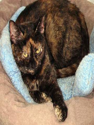

In [56]:
index = 700
print("probability of being a cat: {}".format(cat_index(index)))
animal_pic(index)

In [30]:
huge_conv_model.predict(np.asarray([x_valid[700]]))[0][0]

1/1 [==============================] - 0s 65ms/step


0.00078580744

In [26]:
big_model = keras.models.load_model('huge_conv_model')